# Carga de Librerías y Datos

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

In [63]:
df_train = pd.read_csv('Train_Loan_Home.csv')
df_predecir = pd.read_csv('Test_Loan_Home.csv')

# Limpieza de Datos

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
print(df_train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [66]:
df_train['Loan_ID'] = df_train['Loan_ID'].str[4:]
print(df_train)

    Loan_ID  Gender Married Dependents     Education Self_Employed  \
0      1002    Male      No          0      Graduate            No   
1      1003    Male     Yes          1      Graduate            No   
2      1005    Male     Yes          0      Graduate           Yes   
3      1006    Male     Yes          0  Not Graduate            No   
4      1008    Male      No          0      Graduate            No   
..      ...     ...     ...        ...           ...           ...   
609    2978  Female      No          0      Graduate            No   
610    2979    Male     Yes         3+      Graduate            No   
611    2983    Male     Yes          1      Graduate            No   
612    2984    Male     Yes          2      Graduate            No   
613    2990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1            

In [67]:
genero = {'Female' : 0 , 'Male' : 1}
df_train.Gender = df_train.Gender.map(genero)
df_train.Gender.fillna(0, inplace=True)

In [68]:
casado = {'No' : 0 , 'Yes' : 1}
df_train.Married = df_train.Married.map(casado)
df_train.Married.fillna(0, inplace=True)

In [69]:
graduado = {'Not Graduate' : 0 , 'Graduate' : 1}
df_train.Education = df_train.Education.map(graduado)
df_train.Education.fillna(0, inplace=True)

In [70]:
independiente = {'No' : 0 , 'Yes' : 1}
df_train.Self_Employed = df_train.Self_Employed.map(independiente)
df_train.Self_Employed.fillna(0, inplace=True)

In [71]:
# historial_creditos = {'No' : 0 , 'Yes' : 1}
df_train.Credit_History.fillna(value = 0.0, inplace = True)
df_train.Credit_History = df_train.Credit_History.astype(int)
df_train.Credit_History.fillna(0, inplace=True)

In [72]:
prestamo = {'N' : 0 , 'Y' : 1}
df_train.Loan_Status = df_train.Loan_Status.map(prestamo)

In [73]:
d_zona = {'Urban' : 0, 'Semiurban' : 1, 'Rural' : 2}
df_train['Property_Area'] = df_train['Property_Area'].map(d_zona)

In [74]:
d_dependientes = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_train['Dependents'] = df_train['Dependents'].map(d_dependientes)

In [75]:
df_train.dropna(inplace = True);

In [76]:
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1,2,0
2,1005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1,0,1
3,1006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1,0,1
4,1008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1,0,1
5,1011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1,0,1
6,1013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1,0,1
7,1014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0,1,0
8,1018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1,0,1
9,1020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1,1,0
10,1024,1.0,1.0,2.0,1,0.0,3200,700.0,70.0,360.0,1,0,1


# Se debe limpiar el dataset a predecir también.

In [77]:
df_predecir.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [78]:
df_predecir['Loan_ID'] = df_predecir['Loan_ID'].str[4:]

genero = {'Female' : 0 , 'Male' : 1}
df_predecir.Gender = df_predecir.Gender.map(genero)
df_predecir.Gender.fillna(0, inplace=True)

casado = {'No' : 0 , 'Yes' : 1}
df_predecir.Married = df_predecir.Married.map(casado)
df_predecir.Married.fillna(0, inplace=True)

graduado = {'Not Graduate' : 0 , 'Graduate' : 1}
df_predecir.Education = df_predecir.Education.map(graduado)
df_predecir.Education.fillna(0, inplace=True)

independiente = {'No' : 0 , 'Yes' : 1}
df_predecir.Self_Employed = df_predecir.Self_Employed.map(independiente)
df_predecir.Self_Employed.fillna(0, inplace=True)

df_predecir.Credit_History.fillna(value = 0.0, inplace = True)
df_predecir.Credit_History = df_predecir.Credit_History.astype(int)
df_predecir.Credit_History.fillna(0, inplace=True)

d_zona = {'Urban' : 0, 'Semiurban' : 1, 'Rural' : 2}
df_predecir['Property_Area'] = df_predecir['Property_Area'].map(d_zona)

d_dependientes = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_predecir['Dependents'] = df_predecir['Dependents'].map(d_dependientes)

df_predecir.dropna(inplace = True);

Ya fueron limpiados ambos datasets por lo que es hora de comenzar con los modelos de predicción.

### Voy a estudiar las correlaciones entre las variables.

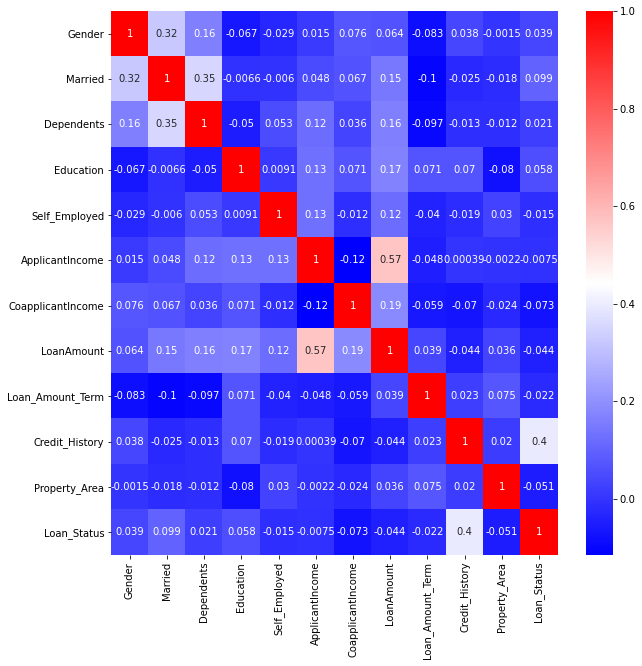

In [79]:
import seaborn as sns
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), cmap='bwr', annot = True) 

## Voy a Separar el data set de train en 2 para poder entrenar y testear.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_train.drop(['Loan_Status'], axis = 1) , df_train['Loan_Status'] , test_size = 0.2)

# Modelos de Machine Learning

Linear Regression

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict_train = lin_reg.predict(X_train)
y_predict_test = lin_reg.predict(X_test)
#lin_reg.score(X_test,y_test)

In [83]:
# Como quiero un sí o un no, voy a tomar un corte. Si es mayor a 0,6, será Sí, sino será No.

y_predict_train[y_predict_train < 0.6] = 0
y_predict_train[y_predict_train >= 0.6] = 1
m = (y_predict_train == y_train)
m.sort_index(ascending = False)
m.value_counts()

True     348
False    104
Name: Loan_Status, dtype: int64

In [84]:
y_predict_test[y_predict_test < 0.6] = 0
y_predict_test[y_predict_test >= 0.6] = 1
mt = (y_predict_test == y_test)
mt.sort_index(ascending = False)
mt.value_counts()

True     84
False    30
Name: Loan_Status, dtype: int64

In [86]:
lin_train_mse = mean_squared_error(y_train, y_predict_train)
lin_test_mse = mean_squared_error(y_test, y_predict_test)

print('El error cuadrado de la regresión lineal en el conjunto entrenado es: ', lin_test_mse)
print('El error cuadrado de la regresión lineal en el conjunto de testeo es: ', lin_train_mse)

El error cuadrado de la regresión lineal en el conjunto entrenado es:  0.2631578947368421
El error cuadrado de la regresión lineal en el conjunto de testeo es:  0.23008849557522124


#

Decision Tree

In [89]:
clf = DecisionTreeRegressor()
model = clf.fit(X_train, y_train)
y_predict_train_tree = clf.predict(X_train)
y_predict_test_tree = clf.predict(X_test)
#clf.score(X_train,y_train )


In [90]:
lin_train_mse_tree = mean_squared_error(y_train, y_predict_train_tree)
lin_test_mse_tree = mean_squared_error(y_test, y_predict_test_tree)

print('El error cuadrado de la arbol de decisiones en el conjunto entrenado es: ', lin_test_mse_tree)
print('El error cuadrado de la arbol de decisiones en el conjunto de testeo es: ', lin_train_mse_tree)

El error cuadrado de la arbol de decisiones en el conjunto entrenado es:  0.35964912280701755
El error cuadrado de la arbol de decisiones en el conjunto de testeo es:  0.0


In [91]:
#import graphviz

#from sklearn import tree
#tree.export_graphviz(clf,out_file='arbol.dot', max_depth = 5)
#graphviz.Source
#with open('arbol.dot') as f:
    #dot_graph=f.read()
    
#graphviz.Source(dot_graph)

Si nos guiamos por los errores en los datasets de testeo, el mejor modelo de Machine Learning
para este caso es el árbol de decisión. Por lo cual, para asegurarnos, correremos sobre los datos
que queremos predecir tanto con el algoritmo de regresión lineal como el árbol de decisión.

### Corro los datos a predecir si dar o no el préstamo con ambos algoritmos

In [26]:
predict_lr = lin_reg.predict(df_predecir)

predict_dt = clf.predict(df_predecir)

In [27]:
predict_lr[predict_lr < 0.6] = 0
predict_lr[predict_lr >= 0.6] = 1

In [28]:
predict_lr = pd.Series(predict_lr, name = 'Loan_Status')
predict_dt = pd.Series(predict_dt, name = 'Loan_Status')

df_predecir.reset_index(inplace = True)

df_predecir_lr = df_predecir.join(predict_lr)
df_predecir_dt = df_predecir.join(predict_dt)

In [29]:
df_predecir_lr

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area,Loan_Status
0,0,1015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1,0,1.0
1,1,1022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1,0,1.0
2,2,1031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1,0,1.0
3,3,1035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0,0,0.0
4,4,1051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,362,2971,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1,0,1.0
343,363,2975,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1,0,1.0
344,364,2980,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,0,1,0.0
345,365,2986,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1,2,1.0


In [30]:
df_predecir_lr.reset_index().to_csv('data.csv',header=True, index=False)

In [92]:
df_predecir_dt

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term_Months,Credit_History,Property_Area,Loan_Status
0,0,1015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1,0,1.0
1,1,1022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1,0,1.0
2,2,1031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1,0,1.0
3,3,1035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,0,0,0.0
4,4,1051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,362,2971,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1,0,1.0
343,363,2975,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1,0,1.0
344,364,2980,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,0,1,0.0
345,365,2986,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1,2,1.0


In [93]:
comparador = (df_predecir_lr['Loan_Status'] == df_predecir_dt['Loan_Status'])
comparador.value_counts()

True     247
False    100
Name: Loan_Status, dtype: int64

#### Esto quiere decir que en 247 clientes ambos métodos nos dieron el mismo resultado, es decir,
#### otorgar el crédito o no otorgarlo. Mientras que para 100 clientes, no concordaron los resultados.

#

In [94]:
aprobados_lr = (df_predecir_lr['Loan_Status'] == 1)
print('La cantidad de préstamos otorgados por el algoritmo de regresión lineal es de: ', aprobados_lr.sum())
aprobados_dt = (df_predecir_dt['Loan_Status'] == 1)
print('La cantidad de préstamos otorgados por el algoritmo del árbol de decisión es de: ', aprobados_dt.sum())

La cantidad de préstamos otorgados por el algoritmo de regresión lineal es de:  262
La cantidad de préstamos otorgados por el algoritmo del árbol de decisión es de:  236


In [34]:
suma_prestada_lr = df_predecir_lr.groupby(['Loan_Status'])['LoanAmount'].sum() * 1000
suma_prestada_dt = df_predecir_dt.groupby(['Loan_Status'])['LoanAmount'].sum() * 1000

print('La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo de regresión lineal es de: US$ ', suma_prestada_lr[1])
print('La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo del árbol de decisión es de: US$ ', suma_prestada_dt[1])

La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo de regresión lineal es de: US$  35821000.0
La suma otorgada en préstamos según los que derían ser aprobados por el algoritmo del árbol de decisión es de: US$  32644000.0
